# Part 2 - Exploratory Data Analysis (EDA)

The objective of this notebook is to perform Exploratory Data Analysis (EDA) on the given dataset. We will use the providing **result.csv**, the dataset containing the results of different set of hyperparameters for XGBoost model and how do they affect the F1-score of the model.

- Descriptive Statistics about F1-score.
  
- Correlations with F1-score.
- Colinearity between features.
- Outliers in the dataset.
- Interactions between features.
- Dataset hierarchical structure.

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('data/results.csv')
data.head()

,learning_rate,n_estimators,max_depth,min_child_weight,subsample,gamma,alpha,lambda,colsample_bytree,scale_pos_weight,F1
0,0.118617,915,9,5,0.921666,0.308145,0.604005,0.564819,0.961160,3,0.808100
1,0.285707,549,4,1,0.946569,0.022430,0.871334,0.339203,0.925768,1,0.818586
2,0.222278,553,7,5,0.623847,0.311273,0.998905,0.322684,0.783664,2,0.804789
3,0.183611,728,7,2,0.876820,0.154459,0.607763,0.644906,0.700715,3,0.804481
4,0.055245,320,8,5,0.655995,0.184363,0.404706,0.851484,0.748128,4,0.807102


## Descriptive Statistics about F1 Score

In [125]:
data['F1'].describe()

count    1500.000000
mean        0.812757
std         0.009669
min         0.778592
25%         0.805767
50%         0.813024
75%         0.820449
max         0.831923
Name: F1, dtype: float64

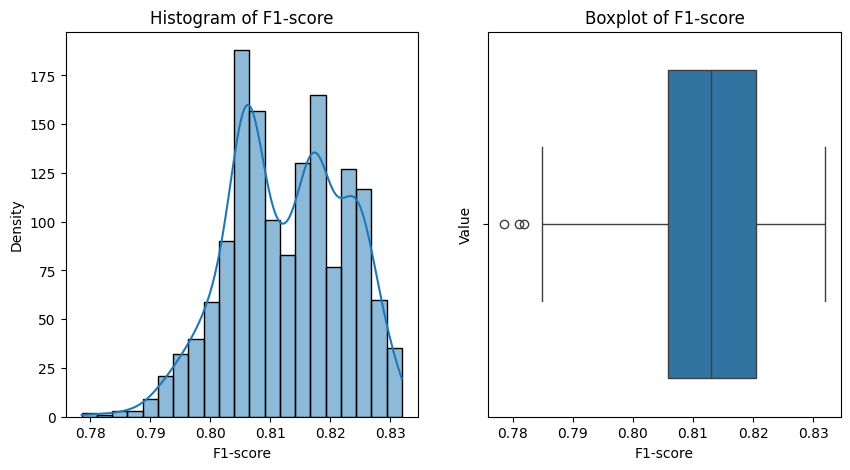

In [126]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plotting the histogram of the F1-score
sns.histplot(data = data, x = 'F1', kde = True, ax = ax[0])
ax[0].set_xlabel('F1-score')
ax[0].set_ylabel('Density')
ax[0].set_title('Histogram of F1-score')

# Plotting the boxplot of the F1-score
sns.boxplot(data = data, x = 'F1', ax = ax[1])
ax[1].set_xlabel('F1-score')
ax[1].set_ylabel('Value')
ax[1].set_title('Boxplot of F1-score');

## Hyperparameters

Here are the hyperparameters used in the XGBoost model:

- `learning_rate`: the learning rate of the gradient descent algorithm.
  
- `n_estimators`: the number of trees in the forest.
- `max_depth`: the maximum depth of each tree.
- `min_child_weight`: the minimum sum of instance weight (hessian) needed in a child.
- `subsample`: the fraction of samples to be used for fitting the individual trees.
- `colsample_bytree`: the fraction of features to be used for fitting the individual trees.
- `gamma`: the minimum loss reduction required to make a further partition on a leaf node of the tree.
- `reg_alpha`: L1 regularization term on weights.
- `reg_lambda`: L2 regularization term on weights.
- `scale_pos_weight`: control the balance of positive and negative weights.

## Correlations with F1 Score

We can find that
- Higher correlation: 
  - max_depth (-0.475)
  - cale_pos_weight (-0.436)
  - learning_rate (-0.339)
  
- Lower correlation: 
  - n_estimators (-0.216)
  - subsample (0.137)
  - gamma (0.101)

- Very weak correlation: 
  - alpha (0.048)
  - min_child_weight (0.015)
  - lambda (-0.002)
  - colsample_bytree (-0.027)

C:\Users\user\AppData\Local\Temp\ipykernel_13716\3327021419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = correlation_with_f1.index, y = correlation_with_f1.values, palette = "coolwarm")


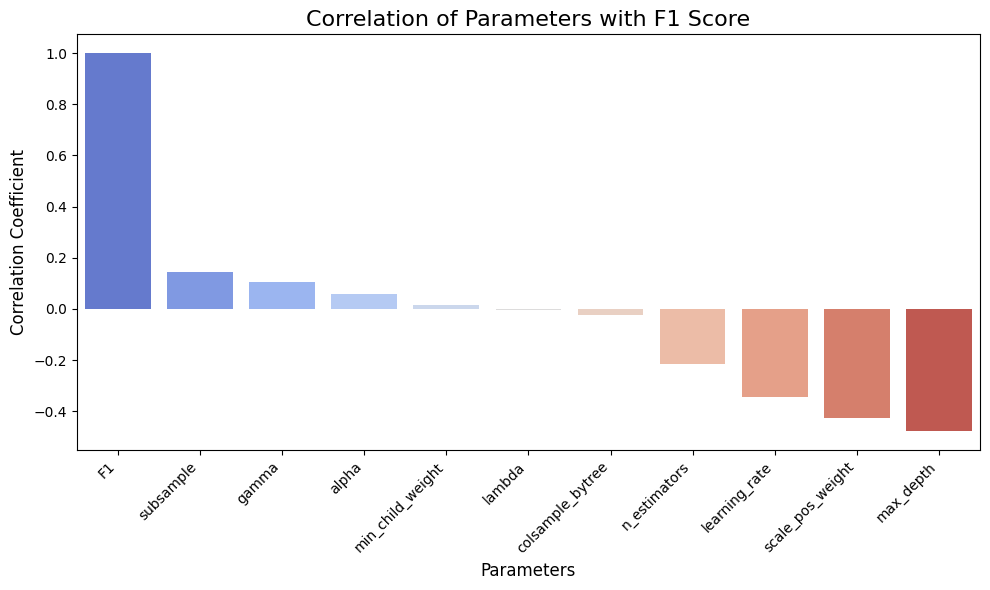

F1                  1.000000
subsample           0.144905
gamma               0.105547
alpha               0.056513
min_child_weight    0.013828
lambda             -0.004580
colsample_bytree   -0.023603
n_estimators       -0.216710
learning_rate      -0.345169
scale_pos_weight   -0.427670
max_depth          -0.478055
Name: F1, dtype: float64

In [127]:
# Correlation with F1 Score
correlation_with_f1 = data.corr()['F1'].sort_values(ascending=False)

plt.figure(figsize = (10, 6))
sns.barplot(x = correlation_with_f1.index, y = correlation_with_f1.values, palette = "coolwarm")
plt.title('Correlation of Parameters with F1 Score', fontsize = 16)
plt.xlabel('Parameters', fontsize = 12)
plt.ylabel('Correlation Coefficient', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

correlation_with_f1


## Colinearity between Features

From the heatmap, we can see that there is no colinearity between the features.

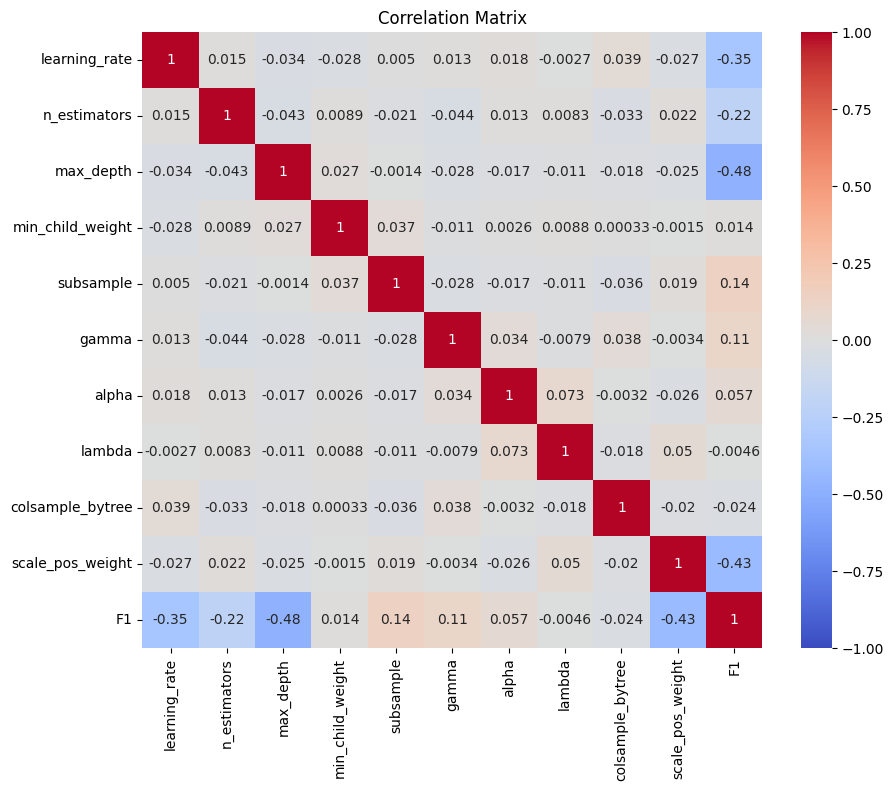

In [128]:
# correlations matrix
corr_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


## Outliers in the Dataset

In this section, we will explore all the continuous features for detecting any outliers. We will use the boxplot to visualize the distribution of the data and identify any outliers.

Fortunately, there is no outlier found in the dataset.

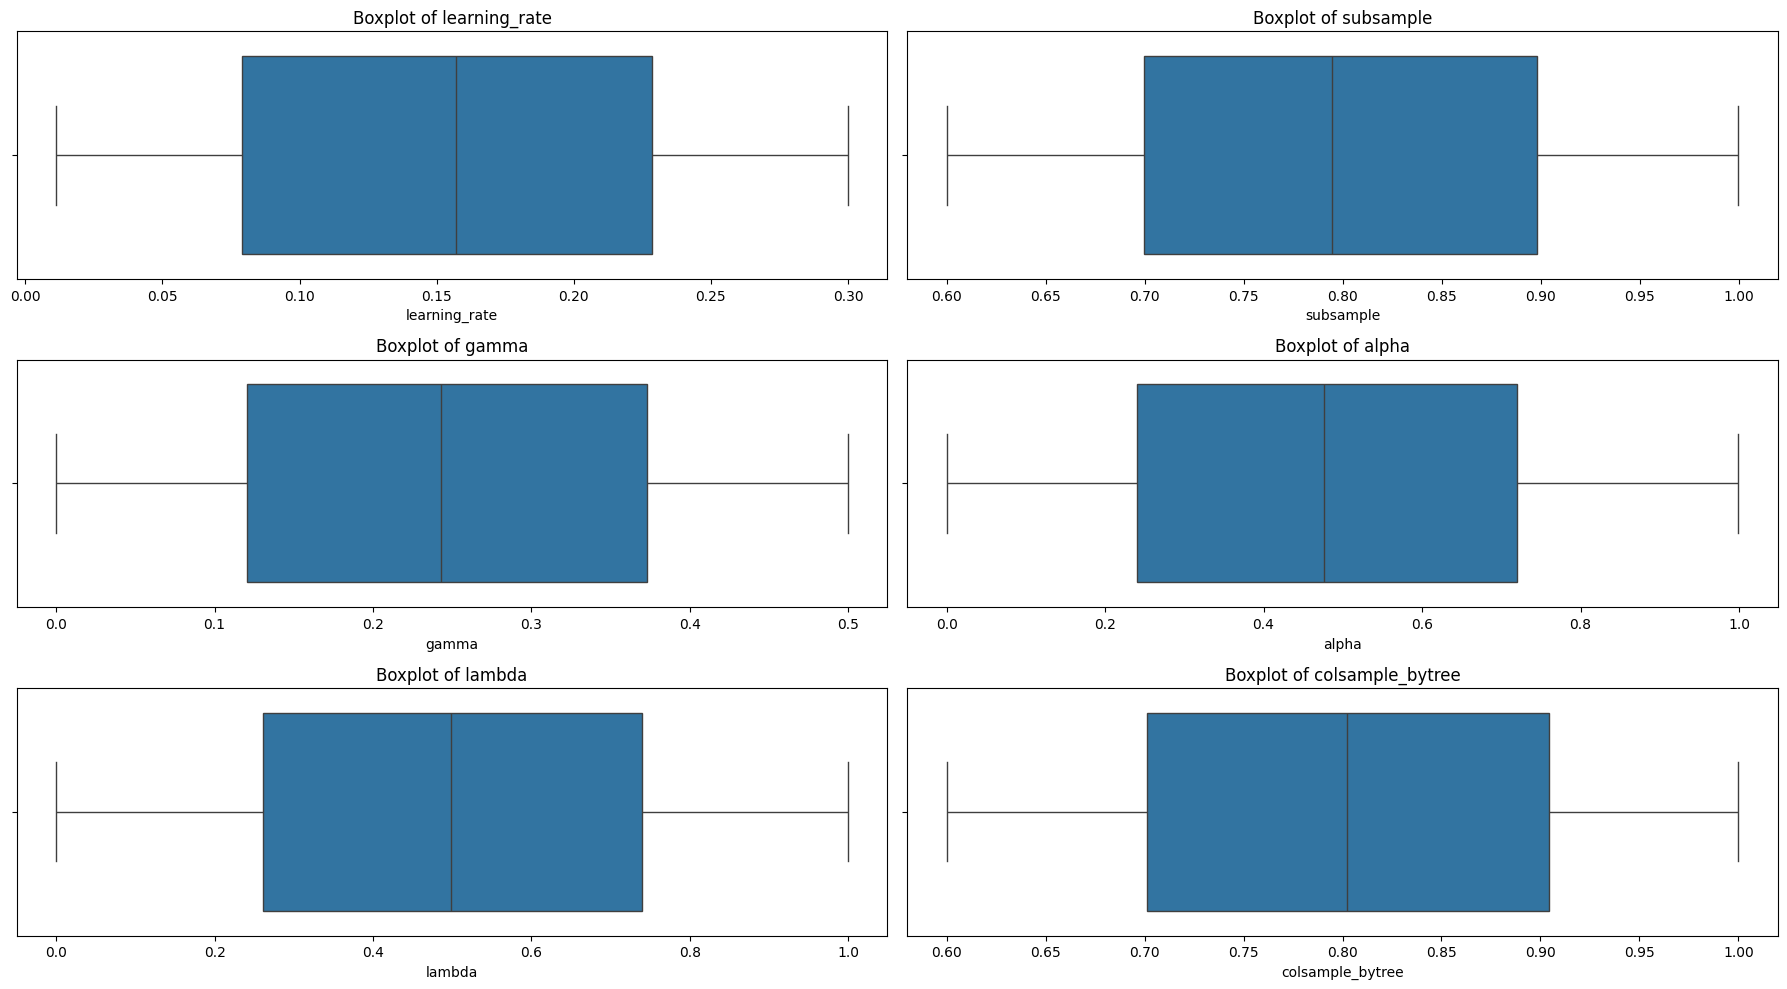

In [129]:
# 假設 df 是你的資料集，並且你已經有一個超參數列表
hyperparameters = ['learning_rate', 'subsample', 
                   'gamma', 'alpha', 'lambda', 'colsample_bytree']

# 設定子圖佈局，這裡是 5 行 2 列
fig, ax = plt.subplots(3, 2, figsize=(18, 10))

# 使用迴圈為每個超參數繪製箱形圖
for i, param in enumerate(hyperparameters):
    row = i // 2  # 取得行位置
    col = i % 2   # 取得列位置
    sns.boxplot(data=data, x=param, ax=ax[row, col])
    ax[row, col].set_title(f'Boxplot of {param}')
    ax[row, col].set_xlabel(param)

# 顯示圖形
plt.tight_layout()
plt.show()


## Interactions between features.

In this section, according to the background knowledge, we will explore some interactions between features:
- `learning_rate * n_estimators`
  
- `learning_rate * max_depth`
- `n_estimators * max_depth`
- `max_depth * subsample`
- `alpha * lambda`
- `max_depth * min_child_weight`
- `scale_pos_weight * max_depth`
- `max_depth * colsample_bytree`

In [130]:
# add interaction terms

data['learning_rate_n_estimators'] = data['learning_rate']    * data['n_estimators']
data['learning_rate_max_depth']    = data['learning_rate']    * data['max_depth']
data['n_estimators_max_depth']     = data['n_estimators']     * data['max_depth']
data['max_depth_subsample']        = data['max_depth']        * data['subsample']
data['alpha_lambda']               = data['alpha']            * data['lambda']
data['max_depth_min_child_weight'] = data['max_depth']        * data['min_child_weight']
data['scale_pos_weight_max_depth'] = data['scale_pos_weight'] * data['max_depth']
data['max_depth_colsample_bytree'] = data['max_depth']        * data['colsample_bytree']

C:\Users\user\AppData\Local\Temp\ipykernel_13716\3327021419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = correlation_with_f1.index, y = correlation_with_f1.values, palette = "coolwarm")


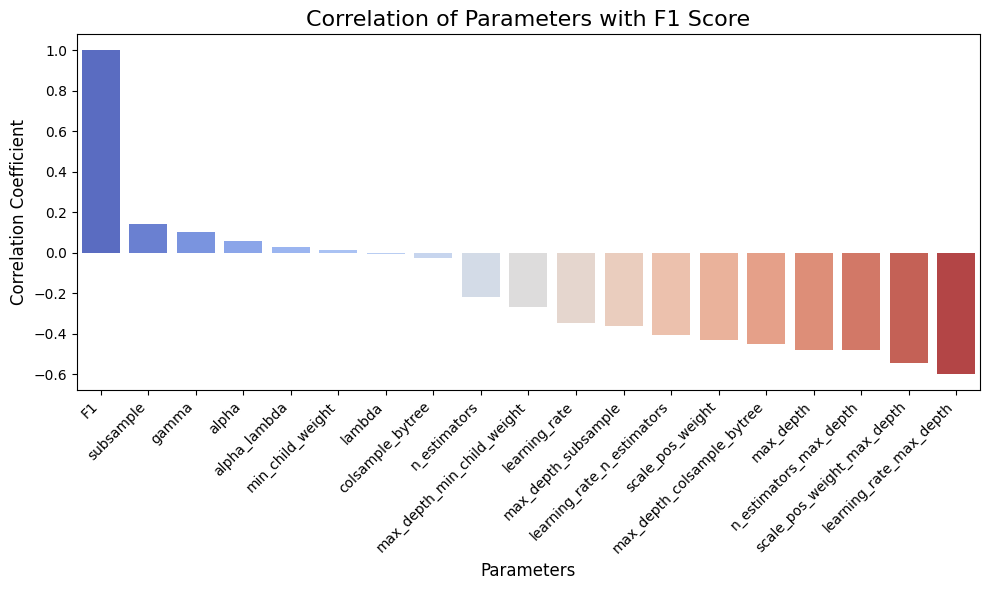

F1                            1.000000
subsample                     0.144905
gamma                         0.105547
alpha                         0.056513
alpha_lambda                  0.027114
min_child_weight              0.013828
lambda                       -0.004580
colsample_bytree             -0.023603
n_estimators                 -0.216710
max_depth_min_child_weight   -0.268091
learning_rate                -0.345169
max_depth_subsample          -0.360709
learning_rate_n_estimators   -0.403951
scale_pos_weight             -0.427670
max_depth_colsample_bytree   -0.451318
max_depth                    -0.478055
n_estimators_max_depth       -0.479972
scale_pos_weight_max_depth   -0.545348
learning_rate_max_depth      -0.597226
Name: F1, dtype: float64

In [131]:
# Correlation with F1 Score
correlation_with_f1 = data.corr()['F1'].sort_values(ascending=False)

plt.figure(figsize = (10, 6))
sns.barplot(x = correlation_with_f1.index, y = correlation_with_f1.values, palette = "coolwarm")
plt.title('Correlation of Parameters with F1 Score', fontsize = 16)
plt.xlabel('Parameters', fontsize = 12)
plt.ylabel('Correlation Coefficient', fontsize = 12)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

correlation_with_f1


In [132]:
data.to_csv('data/eda_data.csv')